# 4.  Measurement

We know how to manipulate the state of qubits with quantum gates. When solving a problem with a quantum computer, we need to extract information from the system after manipulating it. These are measurements. Your return a measurement at the end of your quantum circuit. PennyLane can extract different types of [measurement results](https://docs.pennylane.ai/en/stable/introduction/measurements.html) but careful, not all the functions are available on actual hardware! Some only work in simulation.

Let's use our two qubit Bell pair to study different types of measurements.
$$\vert\psi \rangle = \frac{1}{\sqrt{2}}(\vert 00 \rangle + \vert 11 \rangle)$$

In [ ]:
import pennylane as qml
import numpy as np
from print_latex import print_state_vector
import matplotlib.pyplot as plt

In [ ]:
def bell():
    qml.Hadamard(0)
    qml.CNOT([0,1])

# State (qml.state)

The state measure (`qml.state()`) gives us the most complete output possible, i.e. the complete wave function in the computational basis. It accepts no observables and returns a pure state. When running a circuit on real hardware like MonarQ rather than in a simulation, this function is not available.

In [ ]:
dev = qml.device('default.qubit',wires = 2)
@qml.qnode(dev)
def bell_statevector():
    bell()
    return qml.state()
    
print(bell_statevector())

Why are there four entries? Our Bell pair is in the 2 qubit basis. In other words, 
$$\vert\psi \rangle = \frac{1}{\sqrt{2}}\vert 00 \rangle + 0 \vert 01\rangle + 0 \vert 10 \rangle + \frac{1}{\sqrt{2}}\vert 11 \rangle$$


For convenience, you can use the helper function `print_state_vector`.

In [ ]:
print_state_vector(bell_statevector())

# Probabilities (qml.probs)

In quantum computing, measurement is probabilistic. Recall that for a given state 
$$\vert \psi \rangle  = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$$
the probability of measuring $\vert 0 \rangle$ is $\vert \alpha\vert^2 = \alpha \alpha^* $ and the probability of measuring $\vert \beta \vert^2 = \vert 1 \rangle$ is $\beta \beta^* $ where the * denotes the complex conjugate.

In [ ]:
dev = qml.device('default.qubit',wires = 2)
@qml.qnode(dev)
def bell_probs():
    bell()
    return qml.probs()
    #return qml.probs(wires = 0) It can be useful to only specify one wire as needed

print(bell_probs())

Why are there four entries? Our Bell pair is in the 2 qubit basis. In other words, 
$$\vert\psi \rangle = \frac{1}{\sqrt{2}}\vert 00 \rangle + 0 \vert 01\rangle + 0 \vert 10 \rangle + \frac{1}{\sqrt{2}}\vert 11 \rangle$$

In other words, there is a 50% chance of measuring the state $\vert 00 \rangle$ and a 50% chance of measuring the state $\vert 11 \rangle$. there is a 0% chance of measuring the state $\vert 01 \rangle$ and $\vert 10 \rangle $.

# Expectation values (qml.expval)

An expectation value is a way to measure the “average” result of a quantum measurement if we were to repeat the experiment many times. Instead of returning a single measurement outcome (like 0 or 1), the expectation value tells us about the tendency of a quantum state to be aligned with a particular measurement direction—in the example below, along the Z-axis of the Bloch sphere.

In [ ]:
@qml.qnode(dev)
def bell_expvalZ():
    bell()
    return qml.expval(qml.PauliZ(wires = [0]))

print(bell_expvalZ())

If the result is +1, it means the qubit is entirely in the state aligned with the Z-axis of the Bloch sphere (|0⟩).
If it’s -1, the qubit is in the opposite state along the Z-axis of the Bloch sphere(|1⟩).
Values in between, like 0, mean that the qubit is equally likely to be found in either state along that axis.

The expectation value in this case is 0, reflecting that there’s an equal likelihood of finding qubit 0 in |0⟩ or |1⟩. This tells us about the “average” measurement outcome for qubit 0 in this Bell state—specifically, there’s no bias toward |0⟩ or |1⟩.

EXERCICE

---


Implement the circuit below so that it returns the expectation value of the $Z$ operator. What is this average value? Calculate it explicitly and compare it with the circuit result.

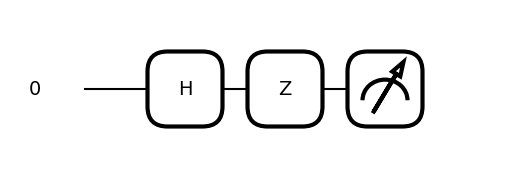

In [ ]:
dev = qml.device("default.qubit", wires = 1)
@qml.qnode(dev)
def circuit():
    ###YOUR CODE HERE####
    return ###YOUR CODE HERE

print(circuit())

Let's calculate the mean value of the operator $ \langle Z \rangle $:


* $H|0\rangle = \frac{1}{\sqrt{2}} \left( |0 \rangle + |1 \rangle \right)$

* $Z \left( \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) \right) = \frac{1}{\sqrt{2}} \left( Z|0\rangle + Z|1\rangle \right) = \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right)$

* The mean value of an operator $( O )$ in a $|\psi\rangle$ state is given by: $\langle O \rangle = \langle \psi | O | \psi \rangle$.


* $\langle Z \rangle = \left\langle \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right) \bigg| Z \bigg| \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right) \right\rangle$

* Which we develop:
$\langle Z \rangle = \frac{1}{2} \left( \langle 0 | Z | 0 \rangle - \langle 0 | Z | 1 \rangle - \langle 1 | Z | 0 \rangle + \langle 1 | Z | 1 \rangle \right)$

* Substitute the effects of $Z$: $\langle Z \rangle =\frac{1}{2} \left( \langle 0 | 0 \rangle + 0 - 0 - \langle 1 | 1 \rangle \right)$
* Since $ \langle 0 | 0 \rangle = 1$ and $\langle 1 | 1 \rangle = 1 $:

* We finally obtain $\langle Z \rangle = \frac{1}{2} (1 - 1) = 0$.


These are nice, but they were all computed exactly. In reality, in an experiment we usually obtain a set of real measurements sampled from the probabilities of $\vert \psi \rangle$, the qubit state. In this case, the actual qubit state $\vert \psi \rangle $ is not accessible, but we can "cheat" as we simulate our circuit in the classical way.


So, if we want to mimic a quantum computer, we can output a set of measurements from the resulting state. To do this, we use the function `qml.sample()`, for which we need to specify the number of samples ('shots') when defining the machine.

In [ ]:
dev = qml.device('default.qubit', wires = 2, shots = 10)
@qml.qnode(dev)
def bell_sample():
    bell()
    return qml.sample(wires = [0,1])

print(bell_sample())

# Counts (qml.counts)

This can be hard to read so it is useful to return the counts of each basis state instead.

In [ ]:
dev = qml.device('default.qubit', wires = 2, shots = 10)
@qml.qnode(dev)
def bell_counts():
    bell()
    return qml.counts()

result = bell_counts()
print(result)

In [ ]:
#Make a histogram of the results
state = list(result.keys())
counts = [value.item() for value in result.values()]

plt.bar(state, counts, color=['blue', 'lightblue'])
plt.xlabel('Quantum States')
plt.ylabel('Counts')

plt.show()

On real quantum hardware, you can only use qml.counts() and qml.sample(). You must specify the number of shots in your experiment. For now, the limit on MonarQ is 1000 per experiment. 

EXERCICE

---

Consider the same simple circuit as in the exercice above. 

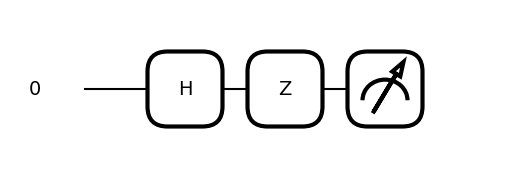

In the first exercice, the expectation value was computed exactly. On real quantum hardware, the probabilistic nature of quantum computation forces us to sample repeatedly in order to calculate the expectation value.

Consider the same circuit, but test it with several 'shots'. What are the possible values after a single shot? What happens when you increase the number of shots? In the cell below, you should
1. Add different numbers of shots to the shots array
2. Define your device within the for loop

In [ ]:
#Adapted from the PennyLane Codebook I.10.2
results = []

n_shots = [] #YOUR CODE HERE #Add different shot numbers to this array
for n in n_shots:
    dev = #YOUR CODE HERE# #define your device here$
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires = 0)
        qml.Z(wires = 0)
        return qml.expval(qml.Z(wires = 0))
    results.append(circuit())

print(results)